/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


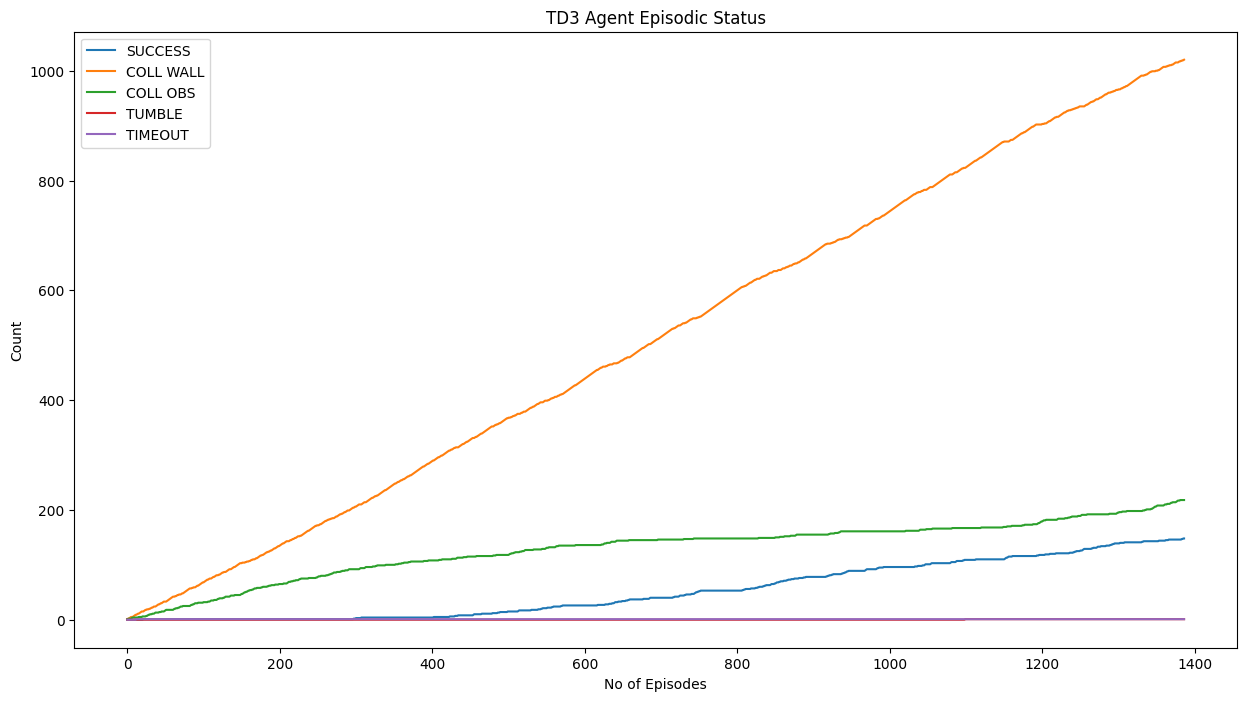

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Specify the path to your CSV file
file_path = 'training_log.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Slice the DataFrame from row 701 to 2088
td3_plot_range = df.iloc[701:2088]
td3_actor_loss = td3_plot_range["Loss_Actor"].apply(lambda x: float(x.strip('tensor()')))
td3_actor_loss = td3_actor_loss.to_numpy()
td3_critic_loss = td3_plot_range["Loss_Critic"].apply(lambda x: float(x.strip('tensor()')))
td3_critic_loss = td3_critic_loss.to_numpy()

td3_success = td3_plot_range["SUCCESS"].to_numpy()
td3_collwall = td3_plot_range['COLL_WALL'].to_numpy()
td3_collobs = td3_plot_range["COLL_OBS"].to_numpy()
td3_tumble = td3_plot_range["TUMBLE"].to_numpy()
td3_timeout = td3_plot_range["TIMEOUT"].to_numpy()

plt.figure(figsize=(15, 8))
plt.plot(td3_success,label="SUCCESS")
plt.plot(td3_collwall, label="COLL WALL")
plt.plot(td3_collobs, label="COLL OBS")
plt.plot(td3_tumble, label="TUMBLE")
plt.plot(td3_timeout, label="TIMEOUT")

plt.legend()
plt.title("TD3 Agent Episodic Status")
plt.xlabel("No of Episodes")
plt.ylabel("Count")

# # Plot the 'Loss_Actor' values
# _, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# ax[0].plot(td3_actor_loss)
# ax[0].set_xlabel('Episodes')
# ax[0].set_ylabel('Loss')
# ax[0].set_title('Actor Loss Plot (TD3)')

# ax[1].plot(td3_critic_loss)
# ax[1].set_xlabel('Episodes')
# ax[1].set_ylabel('Loss')
# ax[1].set_title('Critic Loss Plot (TD3)')
plt.show()


[]

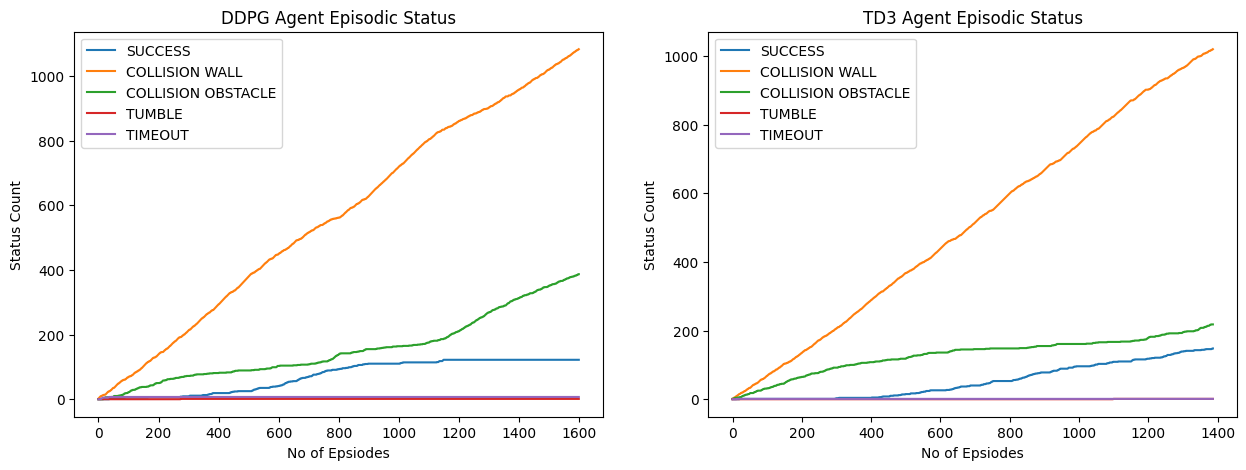

In [2]:
td3_plot_range_2 = df.iloc[2753:4352]

td3_success_2 = td3_plot_range_2["SUCCESS"].to_numpy()
td3_collwall_2 = td3_plot_range_2['COLL_WALL'].to_numpy()
td3_collobs_2 = td3_plot_range_2["COLL_OBS"].to_numpy()
td3_tumble_2 = td3_plot_range_2["TUMBLE"].to_numpy()
td3_timeout_2 = td3_plot_range_2["TIMEOUT"].to_numpy()


_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(td3_success_2,label="SUCCESS")
ax[0].plot(td3_collwall_2, label="COLLISION WALL")
ax[0].plot(td3_collobs_2, label="COLLISION OBSTACLE")
ax[0].plot(td3_tumble_2, label="TUMBLE")
ax[0].plot(td3_timeout_2, label="TIMEOUT")
ax[0].set_title("DDPG Agent Episodic Status")
ax[0].set_xlabel("No of Epsiodes")
ax[0].set_ylabel("Status Count")
ax[0].legend()

ax[1].plot(td3_success,label="SUCCESS")
ax[1].plot(td3_collwall, label="COLLISION WALL")
ax[1].plot(td3_collobs, label="COLLISION OBSTACLE")
ax[1].plot(td3_tumble, label="TUMBLE")
ax[1].plot(td3_timeout, label="TIMEOUT")
ax[1].set_title("TD3 Agent Episodic Status")
ax[1].set_xlabel("No of Epsiodes")
ax[1].set_ylabel("Status Count")

ax[1].legend()
plt.plot()

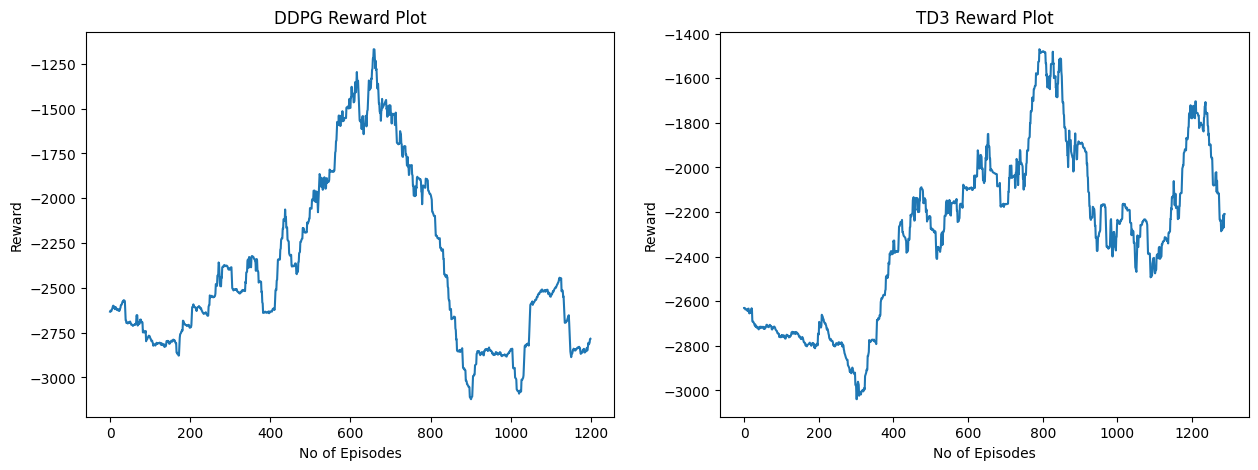

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reward_1 = td3_plot_range["Reward_Sum"].to_numpy()
reward_2 = td3_plot_range_2["Reward_Sum"].to_numpy()

window_size = 100
td3_reward = np.convolve(reward_1, np.ones(window_size)/window_size, mode='valid')
ddpg_reward = np.convolve(reward_2, np.ones(window_size)/window_size, mode='valid')

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(ddpg_reward[:1200])
ax[0].set_title("DDPG Reward Plot")
ax[0].set_xlabel("No of Episodes")
ax[0].set_ylabel("Reward")

ax[1].plot(td3_reward)
ax[1].set_title("TD3 Reward Plot")
ax[1].set_xlabel("No of Episodes")
ax[1].set_ylabel("Reward")

plt.show()



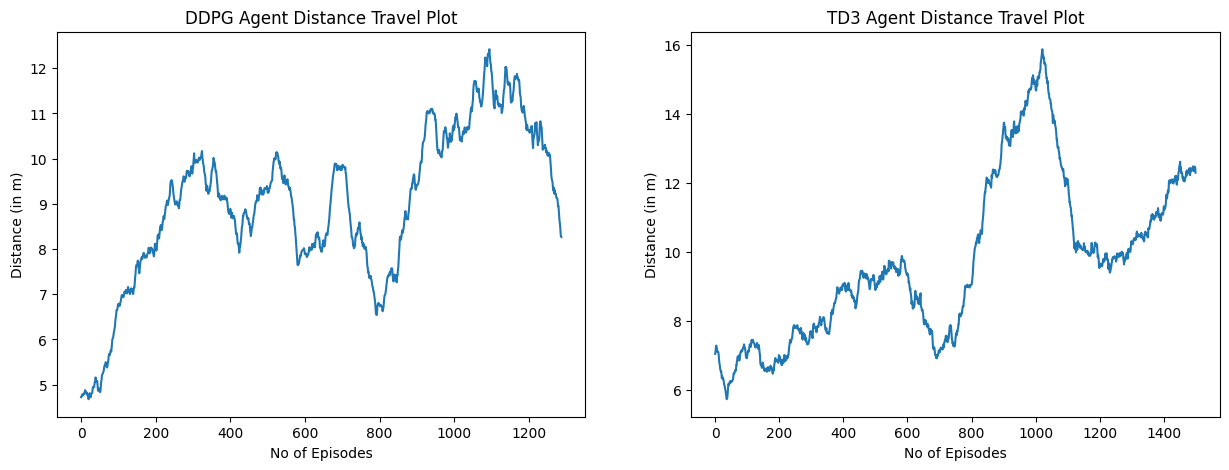

In [48]:
dist_1 = td3_plot_range["Distance_Travelled"].to_numpy()
dist_2 = td3_plot_range_2["Distance_Travelled"].to_numpy()

window_size = 100
td3_dist = np.convolve(dist_1, np.ones(window_size)/window_size, mode='valid')
ddpg_dist = np.convolve(dist_2, np.ones(window_size)/window_size, mode='valid')

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(td3_dist)
ax[0].set_title("DDPG Agent Distance Travel Plot")
ax[0].set_xlabel("No of Episodes")
ax[0].set_ylabel("Distance (in m)")

ax[1].plot(ddpg_dist)
ax[1].set_title("TD3 Agent Distance Travel Plot")
ax[1].set_xlabel("No of Episodes")
ax[1].set_ylabel("Distance (in m)")

plt.show()

Text(0.5, 1.0, 'Critic Loss Plot (TD3)')

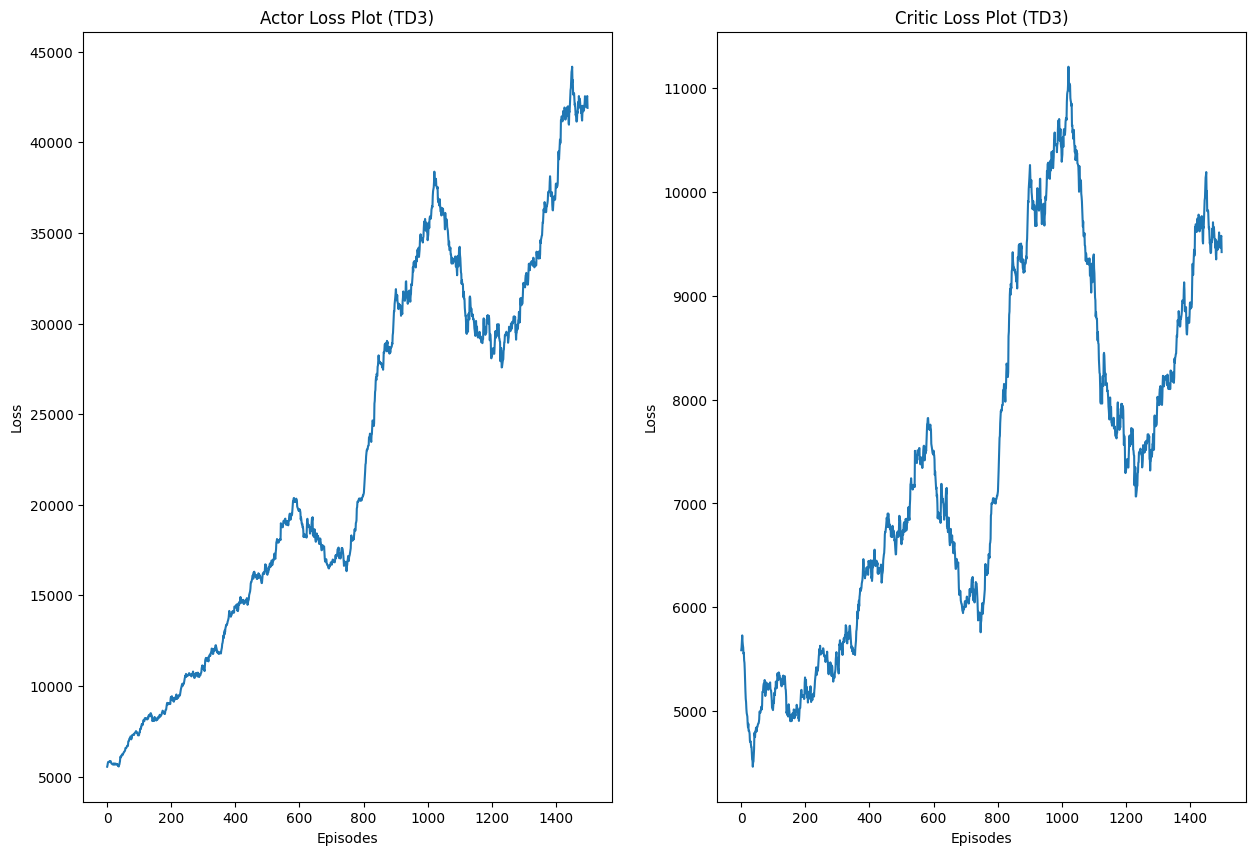

In [53]:
td3_actor_loss = td3_plot_range["Loss_Actor"].apply(lambda x: float(x.strip('tensor()'))).to_numpy()
td3_critic_loss = td3_plot_range["Loss_Critic"].apply(lambda x: float(x.strip('tensor()'))).to_numpy()

ddpg_actor_loss = td3_plot_range_2["Loss_Actor"].apply(lambda x: float(x.strip('tensor()'))).to_numpy()
ddpg_critic_loss = td3_plot_range_2["Loss_Critic"].apply(lambda x: float(x.strip('tensor()'))).to_numpy()

window_size = 100
td3_actor = np.convolve(td3_actor_loss, np.ones(window_size)/window_size, mode='valid')
td3_critic = np.convolve(td3_critic_loss, np.ones(window_size)/window_size, mode='valid')
ddpg_actor = np.convolve(ddpg_actor_loss, np.ones(window_size)/window_size, mode='valid')
ddpg_critic = np.convolve(ddpg_critic_loss, np.ones(window_size)/window_size, mode='valid')

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

ax[0].plot(ddpg_actor)
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Loss')
ax[0].set_title('Actor Loss Plot (TD3)')

ax[1].plot(ddpg_critic)
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Loss')
ax[1].set_title('Critic Loss Plot (TD3)')